In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Машинное обучение (Machine learning)
==

Задачи:
* Классификация
* Кластеризация
* Регрессия (прогноз)
* Детекция аномалий

### ML - это круто!

Рассмотрим [анкету парня Attila Kertesz-Farkas](https://scholar.google.com/citations?user=PcFnWhoAAAAJ&hl=ru)
Самые цитируемые работы, выполненные в 2000-х годах - по классификации последовательностей белков.
То есть он сделал успешную карьеру как биоинформатик.

И...  теперь работает в Высшей Школе Экономики. ... то, что сейчас у вас в мозге - называется когнитивный диссонанс. Разрешается противоречие очень просто - за использование методов машинного обучения - хорошо платят в самых разных областях. А в ВШЭ платят хорошо.


Beeline - 100 000 за практический курс
[Интенсивный курс по изучению машинного обучения и анализа данных](http://bigdata.beeline.digital/#about)

[Введение в Data Science](http://bigdata.beeline.digital/introductory#schedule) за 20 000 Р практически включен в данный курс.

# Использование

### Подбор оптимальных сочетаний, конфигураций

http://link.springer.com/article/10.1007/s10822-016-9960-x

отбор признаков для анализа
https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-016-3320-z


### Классификация сигналов
https://arxiv.org/pdf/1612.05489.pdf


### Облачная робототехника (Cloud Robotics)
Робот - учится и применяет новое знание с долей автономности.

Робот использует вычисления, хранилище данных и помощь человека из "облака". Требует подключения к сети (хотя бы частичного). В зависимости от применения особые условия к задержкам, пропускной способности (ширине) канала, области покрытия.

Представление данных
---

набор данных преобразуется в виде матрицы размером `[n_samples, n_features]`: 

-  **n_samples**: Количество объектов (образцов, samples). Образцом может быть документ, изображение, звуко- или видеозапись, одно измерение прибора, обследование одного пациента, один образец живой ткани или что-то, что можно описать фиксированным набором количественных характеристик.
-  **n_features**: Количество характеристик (показателей, признаков, отличительных черт, features), которые могут быть использованы для количественного описания объекта. Количественные характеристики - это те, которые выражают числами с плавающей запятой. Значения типа категорий или да/нет также приводят к числовому выражению.
    
Итак, исходные данные представлены в виде **матрицы признаков** (feature matrix), где в строчке, соответствующей одному объекту, по разным столбцам записаны разные признаки (характеристики) этого объекта. Данные часто хранят в подобном виде: в таблице базы данных или CSV файле.

Для обучения моделей и проверки качества работы алгоритмов обучения, необходима проверка правильности решений, полученных машиной. Для каждого объекта надо иметь отметку его класса. Такие отметки служат правильными ответами, которые должна "угадать" машина. Отметки образуют **вектор ответов** длиной `n_samples` (label vector). Хранятся отметки обычно вместе с данными - в виде одной из колонок. Перед использованием для машинного обучения эту колонку выделяют отдельно.

Типичной задачей классификации была задача таксономии - разделения видов растений и животных. 
Одним из классических наборов данных был набор измерений трех различных видов ирисов. Внешний вид цветков этих ирисов показан на картинках:

![Iris Setosa](iris_setosa.jpg)
Iris Setosa

![Iris Versicolor](iris_versicolor.jpg)
Iris Versicolor

![](iris_virginica.jpg)
Iris Virginica

In [1]:
''' alternative source of iris data
https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv
'''
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

Набор данных загружается в виде объекта ``Bunch()``, который содержит данные в поле `data` и другую вспомогательную информацию.

In [4]:
iris.keys()

dict_keys(['data', 'DESCR', 'feature_names', 'target', 'target_names'])

In [5]:
print( iris.data.shape)
print( iris.target.shape)

(150, 4)
(150,)


`target` - и есть вектор с правильными ответами, "целями" для алгоритма обучения

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Порядковые числа соответствуют искомым классам - разным видам ириса. Каким именно - указано в поле `target_names`

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Данные представлены в 4 колонках, т.е. 4-мерные. Наглядно на скаттерограмме можно представить попарно - по два измерения за раз.

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


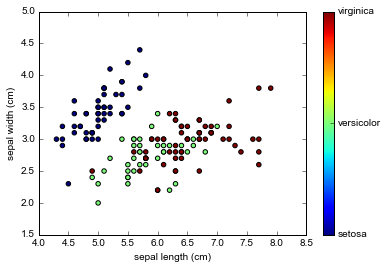

In [9]:
def plot_iris_projection(x_index, y_index):
    # formatter позволяет сопосотавить номера классов с именами классов для отображения на colorbar
    formatter = FuncFormatter(lambda i, *args: iris.target_names[int(i)])

    scatter(iris.data[:, x_index], iris.data[:, y_index],
                c=iris.target)
    colorbar(ticks=[0, 1, 2], format=formatter)
    xlabel(iris.feature_names[x_index])
    ylabel(iris.feature_names[y_index])
    
plot_iris_projection(0, 1)

**Найдите такую комбинацию** `x_index` и `y_index`, чтобы получить максимальное разделение трех классов.

Это упражнение даст вам понимание, как лучше сократить количество измерений, что мы будем делать позже, в разделе **сокращение размерности**.

Далее мы сделаем традиционную таблицу на основе модуля `pandas`

In [10]:
import pandas

In [11]:
df = pandas.DataFrame(iris['data'], columns = iris['feature_names'])
# Add in the Iris Id data
df['species'] = iris['target']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


Колонку с указателем вида переделаем в строки с именами из `iris.target_names`

In [12]:
for i in range(len(iris.target_names)):
    df['species'][df['species']== i] = iris.target_names[i]
# Проверим какие значения теперь в этой колонке
print(df['species'].unique())

['setosa' 'versicolor' 'virginica']


C:\a\WinPython\python-3.4.2.amd64\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Существуют готовые функции для отображения групп данных разными цветами.
Библиотека [ggplot](https://ggplot.yhathq.com/), основанная на `ggplot2` из `R` , позволяет отображать наборы данных в различных статистических представлениях и комбинациях.

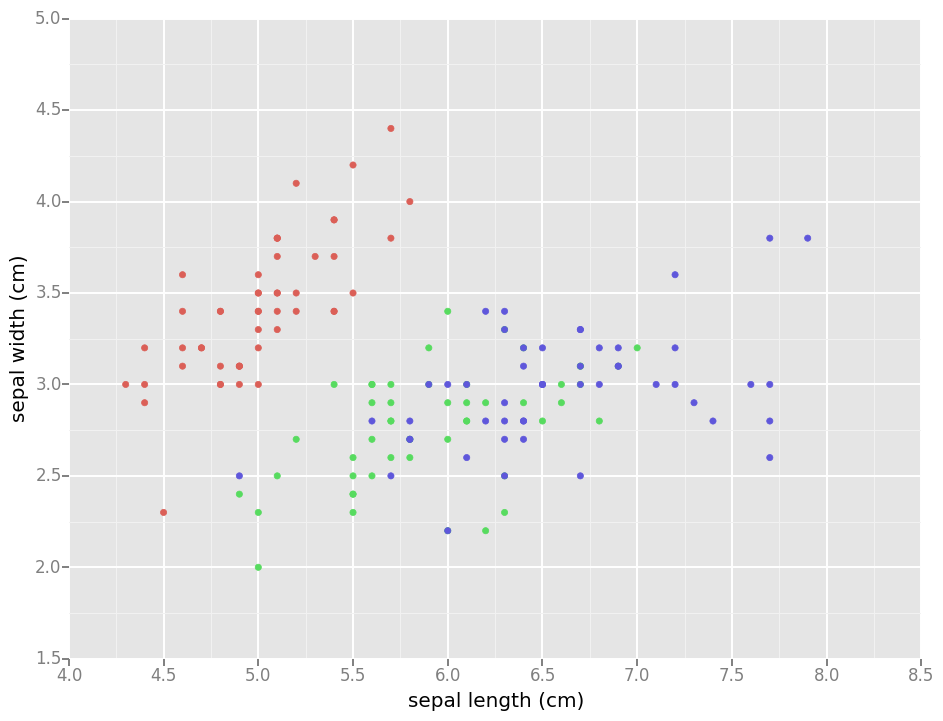

<ggplot: (18775770)>

In [53]:
from ggplot import ggplot, aes, geom_point
ggplot(df, aes(x="sepal length (cm)",y="sepal width (cm)", color = "species"))+geom_point()

4-мерные данные сложно представить. Для изучения соотношений между разными показателями используют попарное представления всех со всеми.

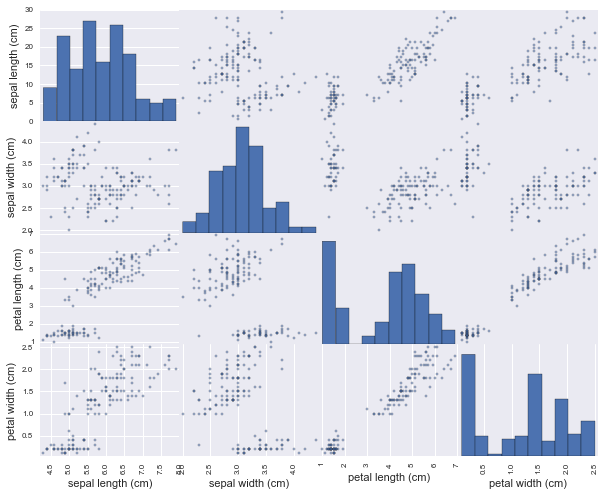

In [35]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, figsize=[10,8]);

Видно, что некоторые характеристики тесно связаны, например, ширина и длина лепестков: облако точек вытянуто по диагонали. 

Раскрасить точки разными цветами можно с помощью параметра color=, но для этого надо сгенерить цвет для каждой точки, напр. так:
```py
color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = iris["target"].map(lambda x: color_wheel.get(x + 1))
```

Чтобы наглядно различать значения для разных видов можно воспользоваться более продвинутыми версиями построителей скаттерограмм.

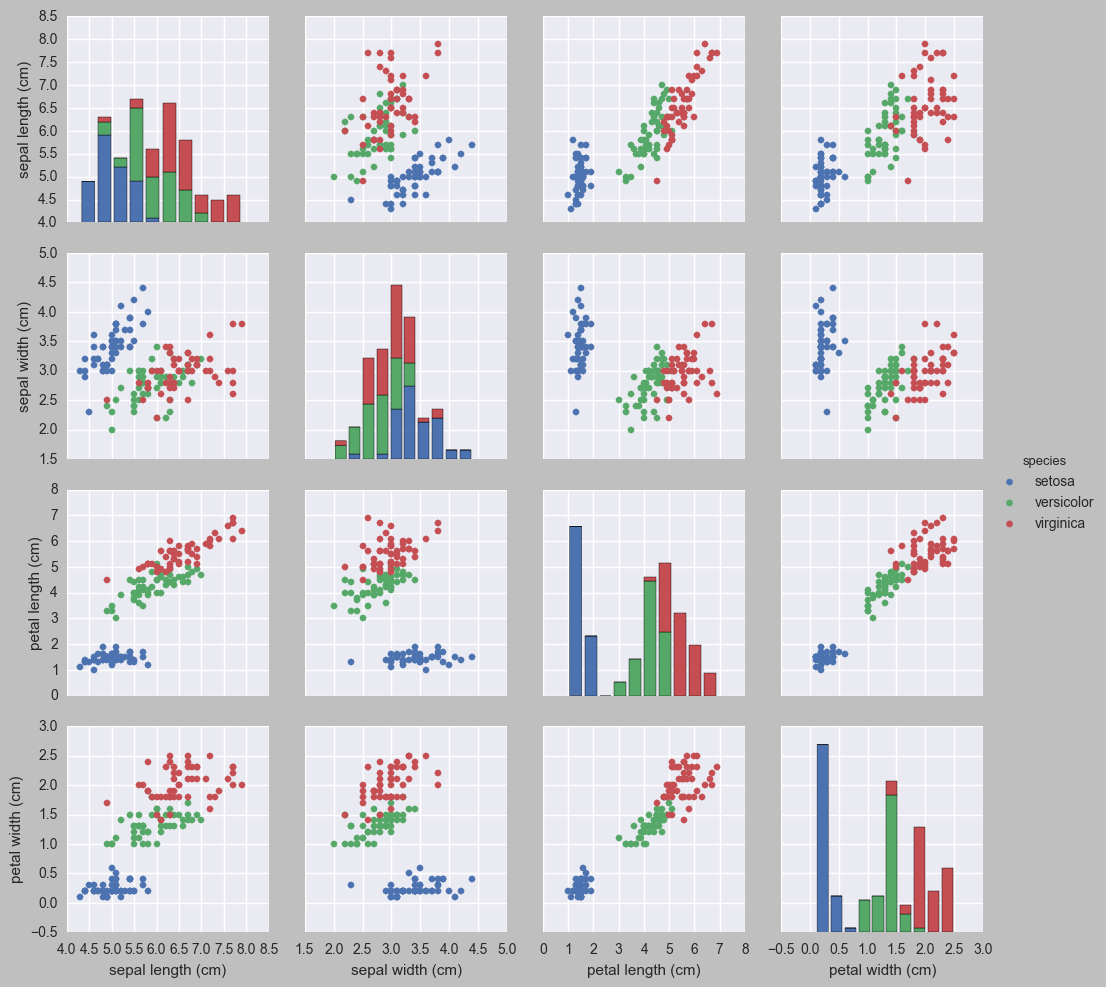

In [39]:
import seaborn

seaborn.set()
#df = seaborn.load_dataset("iris")
seaborn.pairplot(df, hue="species", size=2.5);

И, как это обычно бывает, для специальных нужд надо создать свою функцию рисования (или найти в интернете хороший образец, требующий минимальной доработки)

{'setosa': '#e41a1c', 'versicolor': '#377eb8', 'virginica': '#4eae4b'}

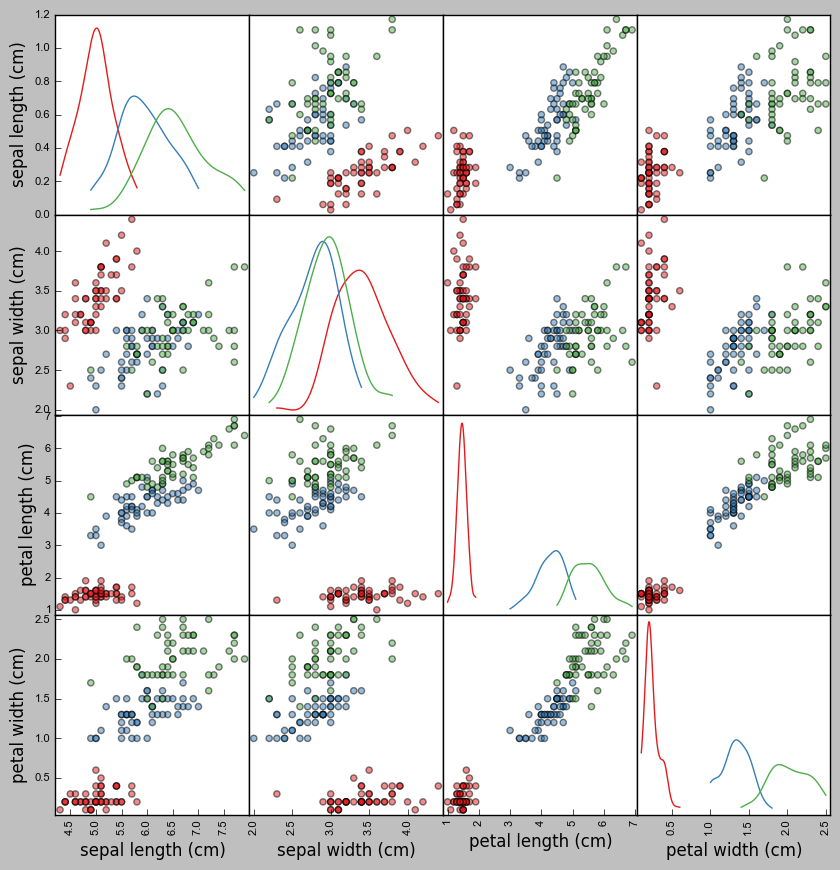

In [40]:
def factor_scatter_matrix(df, factor, palette=None):
    import matplotlib.colors
    import numpy as np
    from pandas.tools.plotting import scatter_matrix
    from scipy.stats import gaussian_kde

    if isinstance(factor, str):
        factor_name = factor
        factor = df[factor]
        df = df.drop(factor_name,axis=1) # удаляем фактор из данных 

    classes = list(set(factor))

    #подбираем цвета
    if palette is None:  #авто цвета на 9 групп
        palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))
    colors = factor.apply(lambda group: color_map[group])
    
    #рисуем скаттерограммы
    axarr = scatter_matrix(df,figsize=(10,10),marker='o',c=colors,diagonal=None)

    #рисуем плотности для классов
    for rc in range(len(df.columns)):
        for group in classes:
            y = df[factor == group].icol(rc).values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])

    #возвращаем ссылки на рисунки и цветовую карту
    return axarr, color_map

seaborn.reset_orig()
axarr, color_map = factor_scatter_matrix(df, 'species');
color_map

При сравнении взаимного распределения по двум факторам гистограммы распределений как бы перпендикулярны друг другу.

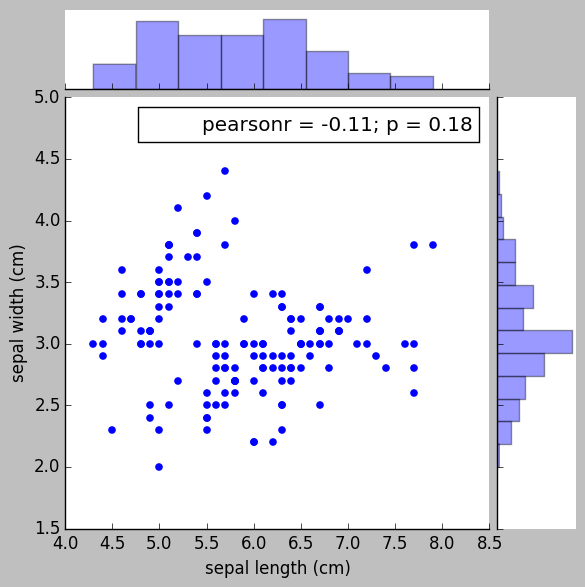

In [46]:
seaborn.jointplot("sepal length (cm)", "sepal width (cm)", df, space=0.1);

Если представить все измерения в ряд, и соединить *паралелльные координаты* линиями, то объекты, входящие в кластер, выглядят ближе к друг другу.

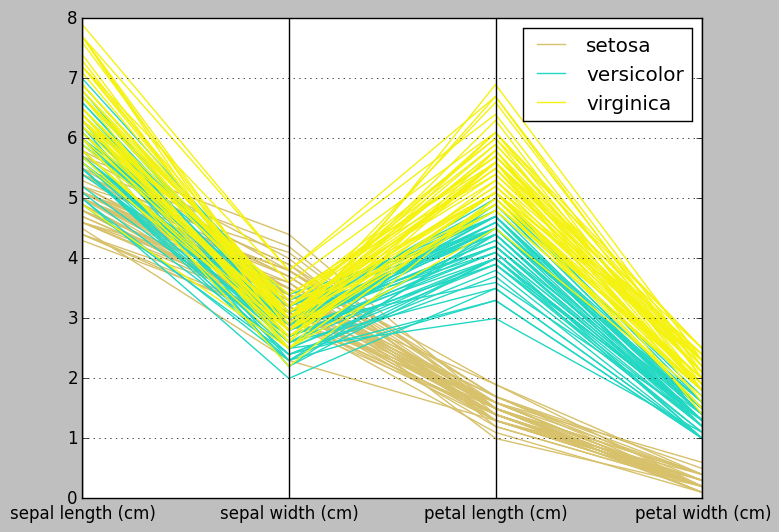

In [41]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, 'species');

Кривые Эндрюса (Andrews curves) позволяют представить многомерные данные в виде большого числа кривых, которые синтезируются как сигналы, восстановленные из разложения Фурье, спектральные коэффициенты которого берутся из данных. При окраске этих кривых в разные цвета можно визуализировать кластеризацию данных.

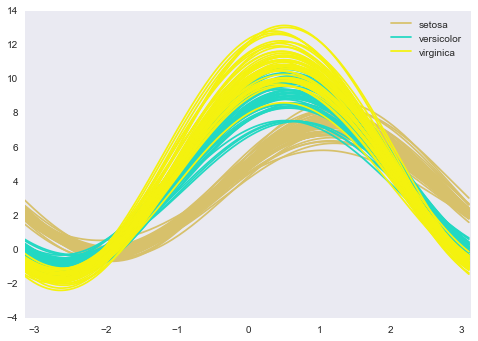

In [21]:
from pandas.tools.plotting import andrews_curves
andrews_curves(df, 'species');

RadViz - еще один алгоритм для визуализации многомерных данных, основанный на метафоре минимизации натяжения струн.
Если измерения представить как опорные точки на плоскости, а отдельные объекты как разноцветные шарики, соединненные с опорными точками резиночками, жесткость которых пропорциональна числовым значениям в данных измерениях, то на рисунке образцы будут отображены в позициях равновесия.

(-1.1, 1.1)

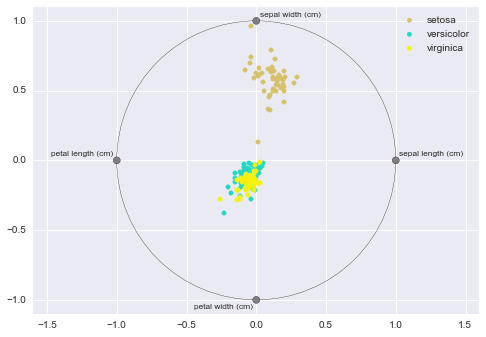

In [34]:
from pandas.tools.plotting import radviz
radviz(df, 'species');
xlim([-1,1]);ylim([-1.1,1.1])

## Распределение в пространстве признаков

Два подхода:
1. Найти центроиды, вокруг которых "кучкуются"  представители соответствующих классов
2. Найти границы, которые делят всё пространство на области преобладания  соответствующих классов

## Дистанция

- геометрическая, euclidian
- редактирования
- прочие

### Пример. Логическая дистанция

кулинарные предпочтения 
характеристика: ест/ не ест

In [10]:
D = pd.DataFrame([], columns=['Homo Canis Felis Sus Мusca Drosophila'.split()])
D

,Homo,Canis,Felis,Sus,Мusca,Drosophila


In [11]:
D.ix['apple',:]=[1,1,0,1,1,1]
D

,Homo,Canis,Felis,Sus,Мusca,Drosophila
apple,1,1,0,1,1,1


## Классификаторы, имитирующие выработку иммунного ответа "свой-чужой"

- данные = антигены
- популяция антител эволюционирует для наилучшего распознования

полная классификация ~ 200 поколений 


![](VALIS_2017_img_3.jpg)

![](VALIS_2017_img_4.jpg)

![](VALIS_2017_img_5.jpg)

In [4]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/nxW_ZtqqgXo?start=70" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

<iframe width="560" height="315" src="https://www.youtube.com/embed/nxW_ZtqqgXo?start=70" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

https://youtu.be/nxW_ZtqqgXo?t=1m10s

### Классификация

http://nbviewer.ipython.org/gist/RMDK/cbf1005e75cd04ad6921

http://datadryad.org/resource/doi:10.5061/dryad.r42qf


???
http://rspb.royalsocietypublishing.org/content/283/1845/20162159.figures-only

## Кластерный анализ. 

*Кластерный анализ* – это метод классификационного анализа; его основное назначение – разбиение множества исследуемых объектов и признаков на однородные в некотором смысле группы, или кластеры.

Кластерный анализ позволяет исследовать множество исходных данных произвольной природы.
Необходимо лишь определиться что сближает между собой объекты, а что отдаляет.

Задача кластерного анализа - разбить множество объектов на $m$ кластеров так, чтобы каждый объект принадлежал только одной группе разбиения. При этом объекты, принадлежащие одному кластеру, должны быть однородными (сходными), а объекты, принадлежащие разным кластерам, – разнородными. 

*Расстояние (distance)* между объектами - метрика сходства между объектами.

## Дискриминантный анализ. 

*Дискриминантный анализ* - старое название приемов классификации размеченных данных (от слова [discriminare](http://dic.academic.ru/dic.nsf/ita_rus/20636/discriminare) - различать), использующих стандартные статистические подходы.
Условия применимости классического дискриминантного анализа – независимые переменные–признаки должны быть привязаны к шкале (не категориальные), и их распределение должно соответствовать нормальному закону.

В последнее время разработано множество эффективных непараметрических методов классификации размеченных данных, то есть когда часть данных уже имеет правильные метки искомых классов наблюдений. Эта часть становится обучающей выборкой для обучения оптимального алгоритма классификации.

## Деревья классификации. 

Деревья классификации – это метод классификационного анализа, позволяющий предсказывать принадлежность объектов к тому или иному классу в зависимости от соответствующих значений признаков, характеризующих объекты. Признаки называются независимыми переменными, а переменная, указывающая на принадлежность объектов к классам, называется зависимой. В отличие от классического дискриминантного анализа, деревья классификации способны выполнять одномерное ветвление по переменными различных типов категориальным, порядковым, интервальным. Не накладываются какие-либо ограничения на закон распределения количественных переменных. По аналогии с дискриминантным анализом метод дает возможность анализировать вклады отдельных переменных в процедуру классификации. Деревья классификации могут быть, а иногда и бывают, очень сложными. Однако использование специальных графических процедур позволяет упростить интерпретацию результатов даже для очень сложных деревьев. Возможность графического представления результатов и простота интерпретации во многом объясняют большую популярность деревьев классификации в прикладных областях, однако, наиболее важные отличительные свойства деревьев классификации – их иерархичность и широкая применимость. Структура метода такова, что пользователь имеет возможность по управляемым параметрам строить деревья произвольной сложности, добиваясь минимальных ошибок классификации. Но по сложному дереву, из-за большой совокупности решающих правил, затруднительно классифицировать новый объект. Поэтому при построении дерева классификации пользователь должен найти разумный компромисс между сложностью дерева и трудоемкостью процедуры классификации. Широкая сфера применимости деревьев классификации делает их весьма привлекательным инструментом анализа данных, но не следует полагать, что его рекомендуется использовать вместо традиционных методов классификационного анализа. Напротив, если выполнены более строгие теоретические предположения, налагаемые традиционными методами, и выборочное распределение обладает некоторыми специальными свойствами (например, соответствие распределения переменных нормальному закону), то более результативным будет использование именно традиционных методов. Однако как метод разведочного анализа или как последнее средство, когда отказывают все традиционные методы, Деревья классификации, по мнению многих исследователей, не знают себе равных.



генетика
http://www.timetree.org/
http://datadryad.org/resource/doi:10.5061/dryad.ph602/1


Let us tuned the parameters of Random Forest just for the purpose of knowledge

There are 3 features which can be tuned to improve the performance of Random Forest

1) max_features 2) n_estimators 3) min_sample_leaf

A)max_features: These are the maximum number of features Random Forest is allowed to try in individual tree. 1)Auto : This will simply take all the features which make sense in every tree.Here we simply do not put any restrictions on the individual tree. 2)sqrt : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree. 3)log2:It is another option which takes log to the base 2 of the features input.

Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered.But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal max_features.

B) n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

C)min_sample_leaf: Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. Hence it is important to try different values to get good estimate.



### n_jobs

This parameter tells the engine how many processors is it allowed to use. A value of “-1” means there is no restriction whereas a value of “1” means it can only use one processor.


# Нейронные сети


Достоинства:
- устойчивы к шуму
- подходят для разных задач: классификация, детекция

Нейронные сети. Нейронные сети представляют собой вычислительную систему, архитектура которой имеет аналогию с построением нервной ткани из нейронов. На нейроны самого нижнего слоя подаются значения входных параметров, на основании которых нужно принимать определенные решения. Например, в соответствии со значениями клинико-лабораторных показателей больного надо отнести его к той или иной группе по степени тяжести заболевания. Эти значения воспринимаются сетью как сигналы, передающиеся в следующий слой, ослабляясь или усиливаясь в зависимости от числовых значений (весов), приписываемых межнейронным связям. В результате на выходе нейрона верхнего слоя вырабатывается некоторое значение, которое рассматривается как ответ – отклик всей сети на входные параметры. Для того, чтобы сеть работала ее надо «натренировать» (обучить) на данных для которых известны значения входных параметров и правильные отклики на них. Обучение состоит в подборе весов межнейронных связей, обеспечивающих наибольшую близость ответов к известным правильным ответам. Нейронные сети могут быть использованы для классификации наблюдений.

выполнение в железе - аналоговые схемы

используются FPGA

последние разработки - spiking neuron network (SNN) - 1bit сигнал - более эффективны по использованию памяти
Spike Timing Dependant Plasticity

In [ ]:
from sklearn.neural_network import MLPClassifier


Tuning the hyperparameters of the neural network

It is turning out to be computationally expensive for me with tuned model. Hence I am not running this. Also any suggestion to improvise it is welcome. :)

1) hidden_layer_sizes : Number of hidden layers in the network.(default is 100).Large number may overfit the data.

2)activation: Activation function for the hidden layer. A)‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)). B)‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x). C)‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

3)alpha: L2 penalty (regularization term) parameter.(default 0.0001)

4)max_iter: Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations.(default 200)


## Разные классификаторы подходят для разных задач

![](VALIS_Performance.png)

Vote-ALlocating Immune System (VALIS), k nearest neighbours (kNN), logistic regression (LR), linear and quadratic discriminant analysis (LDA, QDA), naive Bayes (NB), AdaBoost (AB), decision trees (CART), random forests (RF), support vector machines (SVM).

## Полуавтоматическое обучение

Система автоматически классифицирует объекты похожие на те, что в обучающей выборке, и привлекает человека в новых или неопределенных случаях. 

Позволяет привлечь компьютер уже на стадии разметки обучающей выборки.

<b class=tag>human-in-the-loop</b>
<b class=tag>тренировка ИИ</b>

Общедоступные сервисы https://www.crowdflower.com/

**Пример.**

Прогнозирование увядания побегов для агрокультуры - модель от толщины стебля и движения листьев.
www.sciencedirect.com/science/article/pii/S0950705117303507

### +++:

[Шабанов Д. А. Кластеры, клады и химера объективности. 2011](https://batrachos.com/Кластеры_клады_и_химера_объективности)

[Шабанов Д. А. Ложь, наглая ложь и… // Компьютерра, М., 2006. – № 25–26 (645–646)](https://batrachos.com/Ложь_наглая_ложь_и)

[NEXUS Tree format](https://en.wikipedia.org/wiki/Newick_format)

[Weka 3: Data Mining Software in Java](http://www.cs.waikato.ac.nz/ml/weka/) и [курс от создателей](http://www.cs.waikato.ac.nz/ml/weka/mooc/dataminingwithweka/)